# Quantum Bayesian Decisions Verification

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview

/home/michael/anaconda3/envs/Qiskitenv/lib/python3.7/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


In [2]:
from qiskit import IBMQ
IBMQ.enable_account('1657029970d40f6aca619ea0b546e547c280ce69242dd4ba534f94a6edfc1972cbc329d1b859e876c89f82996eae0b976c91980d5c7bc6f9e141cfd56491eb92',
                    url='https://q-console-api.mybluemix.net/api',
                    hub='ibm-q-academic',
                    group='univ-minho',
                    project='quantalab')

## Preparation of the Quantum Registers (L=0,A=1,R=2,U=3)

In [3]:
q_v = QuantumRegister(4, name='qv')
q_ext = QuantumRegister(14, name='qext')
c_v = ClassicalRegister(4)
c_ext = ClassicalRegister(14)

circuit = QuantumCircuit(q_v,q_ext,c_v, c_ext)

## Preparation of the state of the Bayesian Network 

In [4]:
#Variable L
circuit.u3(1.23,0,0,q_v[0])

#Variable A
circuit.h(q_v[1])

#Variable R
circuit.ccx(q_v[0],q_v[1],q_ext[0])
circuit.cu3(1.71,0,0,q_ext[0],q_v[2])
circuit.ccx(q_v[0],q_v[1],q_ext[0])
circuit.barrier(q_v,q_ext)

circuit.x(q_ext[1])
circuit.cx(q_v[0],q_ext[1])
circuit.ccx(q_ext[1],q_v[1],q_ext[2])
circuit.cu3(0.927,0,0,q_ext[2],q_v[2])
circuit.ccx(q_ext[1],q_v[1],q_ext[2])
circuit.cx(q_v[0],q_ext[1])
circuit.x(q_ext[1])

circuit.barrier(q_v,q_ext)

circuit.x(q_ext[3])
circuit.cx(q_v[1],q_ext[3])
circuit.ccx(q_v[0],q_ext[3],q_ext[4])
circuit.cu3(0.722,0,0,q_ext[4],q_v[2])
circuit.ccx(q_v[0],q_ext[3],q_ext[4])
circuit.cx(q_v[1],q_ext[3])
circuit.x(q_ext[3])

circuit.barrier(q_v,q_ext)

circuit.x(q_ext[5])
circuit.x(q_ext[6])
circuit.cx(q_v[0],q_ext[5])
circuit.cx(q_v[1],q_ext[6])
circuit.ccx(q_ext[5],q_ext[6],q_ext[7])
circuit.cu3(1.77,0,0,q_ext[7],q_v[2])
circuit.ccx(q_ext[5],q_ext[6],q_ext[7])
circuit.cx(q_v[1],q_ext[6])
circuit.cx(q_v[0],q_ext[5])
circuit.x(q_ext[6])
circuit.x(q_ext[5])

circuit.barrier(q_v,q_ext)

## Preparation of the Utility function 

In [5]:
circuit.u3(2,0,0,q_v[3])
circuit.barrier(q_v,q_ext)

## Application of the Utility function(Grover)

In [6]:
######################################
### Oracle for 0000,0011,0100,1110 ###
######################################

#0000
circuit.x(q_v[0])
circuit.x(q_v[1])
circuit.x(q_v[2])
circuit.x(q_v[3])

circuit.cu1(pi/4, q_v[0], q_v[3])
circuit.cx(q_v[0], q_v[1])
circuit.cu1(-pi/4, q_v[1], q_v[3])
circuit.cx(q_v[0], q_v[1])
circuit.cu1(pi/4, q_v[1], q_v[3])
circuit.cx(q_v[1], q_v[2])
circuit.cu1(-pi/4, q_v[2], q_v[3])
circuit.cx(q_v[0], q_v[2])
circuit.cu1(pi/4, q_v[2], q_v[3])
circuit.cx(q_v[1], q_v[2])
circuit.cu1(-pi/4, q_v[2], q_v[3])
circuit.cx(q_v[0], q_v[2])
circuit.cu1(pi/4, q_v[2], q_v[3])

circuit.x(q_v[0])
circuit.x(q_v[1])
circuit.x(q_v[2])
circuit.x(q_v[3])



##1100 
circuit.x(q_v[0])
circuit.x(q_v[1])

circuit.cu1(pi/4, q_v[0], q_v[3])
circuit.cx(q_v[0], q_v[1])
circuit.cu1(-pi/4, q_v[1], q_v[3])
circuit.cx(q_v[0], q_v[1])
circuit.cu1(pi/4, q_v[1], q_v[3])
circuit.cx(q_v[1], q_v[2])
circuit.cu1(-pi/4, q_v[2], q_v[3])
circuit.cx(q_v[0], q_v[2])
circuit.cu1(pi/4, q_v[2], q_v[3])
circuit.cx(q_v[1], q_v[2])
circuit.cu1(-pi/4, q_v[2], q_v[3])
circuit.cx(q_v[0], q_v[2])
circuit.cu1(pi/4, q_v[2], q_v[3])

circuit.x(q_v[0])
circuit.x(q_v[1])

#0100

circuit.x(q_v[0])
circuit.x(q_v[2])
circuit.x(q_v[3])

circuit.cu1(pi/4, q_v[0], q_v[3])
circuit.cx(q_v[0], q_v[1])
circuit.cu1(-pi/4, q_v[1], q_v[3])
circuit.cx(q_v[0], q_v[1])
circuit.cu1(pi/4, q_v[1], q_v[3])
circuit.cx(q_v[1], q_v[2])
circuit.cu1(-pi/4, q_v[2], q_v[3])
circuit.cx(q_v[0], q_v[2])
circuit.cu1(pi/4, q_v[2], q_v[3])
circuit.cx(q_v[1], q_v[2])
circuit.cu1(-pi/4, q_v[2], q_v[3])
circuit.cx(q_v[0], q_v[2])
circuit.cu1(pi/4, q_v[2], q_v[3])

circuit.x(q_v[0])
circuit.x(q_v[2])
circuit.x(q_v[3])


#0111

circuit.x(q_v[0])

circuit.cu1(pi/4, q_v[0], q_v[3])
circuit.cx(q_v[0], q_v[1])
circuit.cu1(-pi/4, q_v[1], q_v[3])
circuit.cx(q_v[0], q_v[1])
circuit.cu1(pi/4, q_v[1], q_v[3])
circuit.cx(q_v[1], q_v[2])
circuit.cu1(-pi/4, q_v[2], q_v[3])
circuit.cx(q_v[0], q_v[2])
circuit.cu1(pi/4, q_v[2], q_v[3])
circuit.cx(q_v[1], q_v[2])
circuit.cu1(-pi/4, q_v[2], q_v[3])
circuit.cx(q_v[0], q_v[2])
circuit.cu1(pi/4, q_v[2], q_v[3])

circuit.x(q_v[0])


In [7]:
#######################
#### Amplification ####
#######################
circuit.h(q_v[0])
circuit.h(q_v[1])
circuit.h(q_v[2])
circuit.h(q_v[3])
circuit.x(q_v[0])
circuit.x(q_v[1])
circuit.x(q_v[2])
circuit.x(q_v[3])
######## cccZ #########
circuit.cu1(pi/4, q_v[0], q_v[3])
circuit.cx(q_v[0], q_v[1])
circuit.cu1(-pi/4, q_v[1], q_v[3])
circuit.cx(q_v[0], q_v[1])
circuit.cu1(pi/4, q_v[1], q_v[3])
circuit.cx(q_v[1], q_v[2])
circuit.cu1(-pi/4, q_v[2], q_v[3])
circuit.cx(q_v[0], q_v[2])
circuit.cu1(pi/4, q_v[2], q_v[3])
circuit.cx(q_v[1], q_v[2])
circuit.cu1(-pi/4, q_v[2], q_v[3])
circuit.cx(q_v[0], q_v[2])
circuit.cu1(pi/4, q_v[2], q_v[3])
####### end cccZ #######
circuit.x(q_v[0])
circuit.x(q_v[1])
circuit.x(q_v[2])
circuit.x(q_v[3])
circuit.h(q_v[0])
circuit.h(q_v[1])
circuit.h(q_v[2])
circuit.h(q_v[3])

In [8]:
circuit.barrier(q_v,q_ext)
circuit.measure(q_v,c_v)

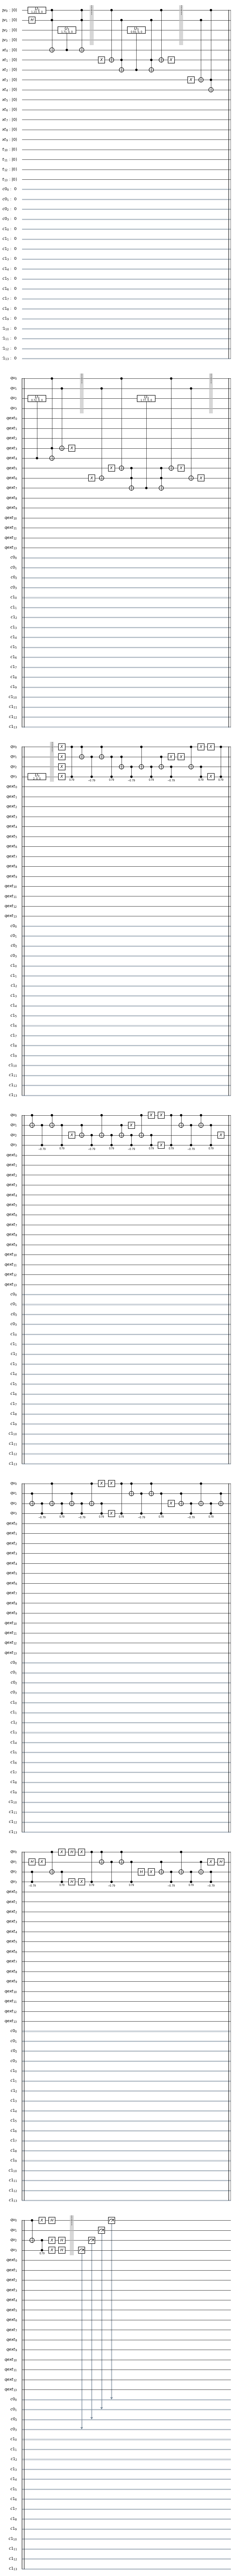

In [9]:
circuit.draw(output='mpl',scale=0.5)

In [10]:
backend = IBMQ.get_backend('ibmq_qasm_simulator')
backend.name()
job = execute(circuit, backend,shots=5000)
job_monitor(job, interval=5)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

In [11]:
counts=job.result().get_counts(circuit)
job.result().get_counts(circuit)

{'00000000000000 0100': 9,
 '00000000000000 1100': 1682,
 '00000000000000 1011': 4,
 '00000000000000 0110': 14,
 '00000000000000 1000': 54,
 '00000000000000 0001': 1,
 '00000000000000 0000': 761,
 '00000000000000 0011': 16,
 '00000000000000 1101': 21,
 '00000000000000 1010': 250,
 '00000000000000 0101': 68,
 '00000000000000 1110': 898,
 '00000000000000 0111': 7,
 '00000000000000 1001': 72,
 '00000000000000 0010': 1123,
 '00000000000000 1111': 20}

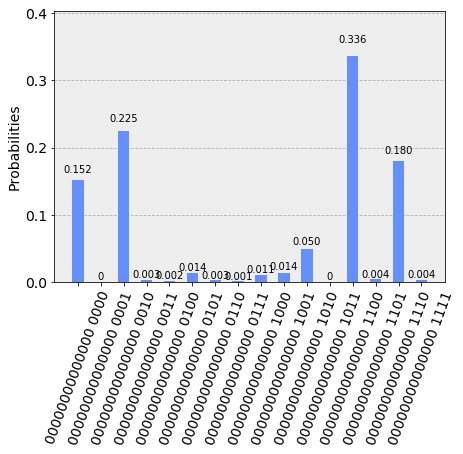

In [12]:
plot_histogram(counts)